# 당뇨병 진행상황 예측 지도학습 학습모델 평가 

In [2]:
# 불필요한 경고 출력을 방지
import warnings
warnings.filterwarnings('ignore')

## 학습모델 평가 방법(Evaluation)
- 오차 (Error) 이해
- Accuracy(정확도)
- Confusion Matrix(오차행렬)
- Precision(정밀도)
- Recall(재현율)
- F1 score
- ROC/AUC


In [5]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

유방암 환자 데이터셋 로드  
sklearn의 내장 dataset 활용 : load_breast_cancer  
target :
- 1 양성종양 : 착한 종양(Positive)
- 0 악성종양 : 나쁜 종양(Negative)

In [6]:
diabetes = load_diabetes()

In [7]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [8]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [10]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [12]:
# feature(X), target(y), feature_names 분리
data = diabetes['data']
target = diabetes['target']
feature_names=diabetes['feature_names']

데이터 프레임으로 생성

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [82]:
df = pd.DataFrame(data=data, columns=feature_names)


In [92]:
df = pd.DataFrame(data=data, columns=feature_names)
df['target'] = diabetes['target']

<AxesSubplot:>

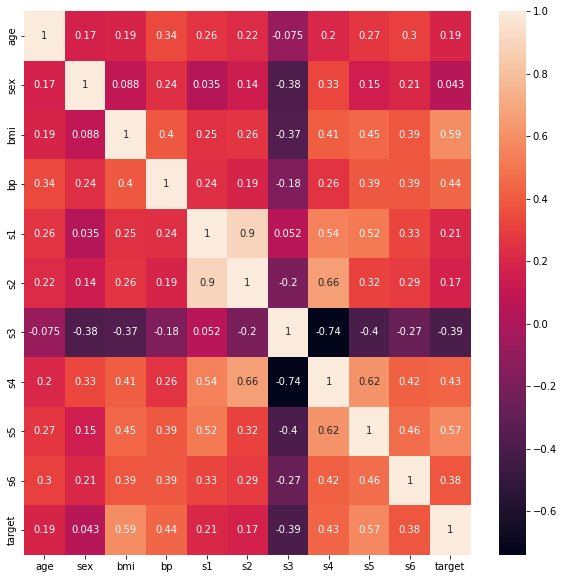

In [93]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [85]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [86]:
del df['age']

In [87]:
del df['sex']

In [88]:
del df['s1']

In [89]:
del df['s2']

In [90]:
df

,bmi,bp,s3,s4,s5,s6,target
0,0.061696,0.021872,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.044451,-0.005671,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.011595,-0.036656,-0.036038,0.034309,0.022692,-0.009362,206.0
4,-0.036385,0.021872,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...
437,0.019662,0.059744,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.015906,-0.067642,-0.028674,0.034309,-0.018118,0.044485,104.0
439,-0.015906,0.017282,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,0.039062,0.001215,-0.028674,0.026560,0.044528,-0.025930,220.0


<AxesSubplot:>

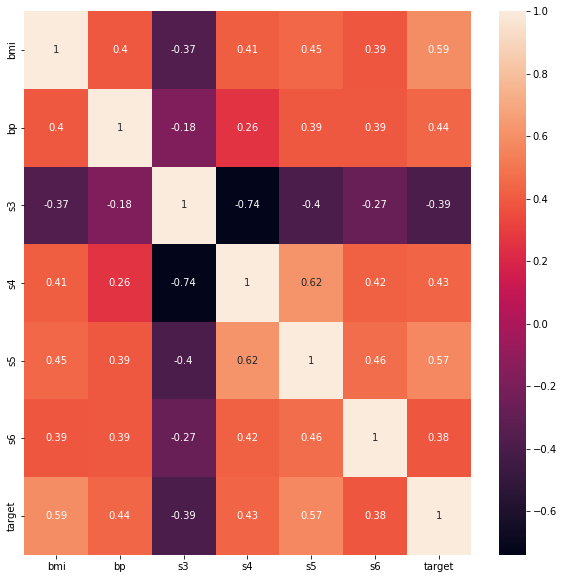

In [91]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [50]:
X = df.drop('target', axis=1)
y = df['target']

In [51]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     442 non-null    float64
 1   bp      442 non-null    float64
 2   s3      442 non-null    float64
 3   s4      442 non-null    float64
 4   s5      442 non-null    float64
 5   s6      442 non-null    float64
dtypes: float64(6)
memory usage: 20.8 KB


In [52]:
X.describe()

,bmi,bp,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-8.013951e-16,1.289818e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-9.027530e-02,-1.123996e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.422907e-02,-3.665645e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,-7.283766e-03,-5.670611e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.124802e-02,3.564384e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.705552e-01,1.320442e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=20, shuffle=True)

In [54]:
X_train

,bmi,bp,s3,s4,s5,s6
189,-0.066563,0.001215,0.011824,-0.002592,-0.020289,-0.025930
417,0.071397,-0.074528,0.004460,-0.021412,-0.046879,0.003064
89,-0.048241,-0.019442,0.067048,-0.039493,-0.024791,0.019633
117,-0.021295,0.087287,-0.047082,0.071210,0.079121,0.135612
121,0.017506,0.021872,-0.036038,0.034309,0.019908,0.011349
...,...,...,...,...,...,...
218,-0.065486,-0.040099,-0.043401,0.034309,0.007027,-0.013504
412,0.085408,0.063187,0.015505,-0.002592,0.006209,0.085907
223,-0.023451,-0.064199,0.011824,-0.039493,-0.018118,-0.050783
271,0.008883,0.042530,-0.039719,-0.002592,-0.018118,0.007207


In [55]:
X_test

,bmi,bp,s3,s4,s5,s6
160,-0.062252,-0.074528,0.004460,-0.039493,-0.035817,-0.046641
415,0.008883,-0.050428,-0.043401,0.071210,0.014823,0.003064
432,0.055229,-0.005671,-0.002903,0.023239,0.055684,0.106617
343,0.018584,0.090730,0.037595,-0.039493,-0.057800,0.007207
287,-0.006206,-0.015999,0.019187,0.034309,0.032433,-0.005220
...,...,...,...,...,...,...
165,-0.066563,-0.046985,0.048640,-0.039493,-0.056158,-0.013504
197,0.003494,0.070073,-0.054446,0.034309,0.013316,0.036201
115,0.001339,-0.005671,-0.047082,0.108111,0.083797,0.003064
98,-0.005128,-0.012556,0.008142,-0.039493,-0.006080,-0.067351


In [56]:
y_train

189     79.0
417     55.0
89     111.0
117    281.0
121    173.0
       ...  
218    214.0
412    261.0
223    150.0
271    127.0
355     60.0
Name: target, Length: 331, dtype: float64

In [57]:
y_test

160     53.0
415    174.0
432    173.0
343    113.0
287    219.0
       ...  
165     59.0
197    129.0
115    229.0
98      92.0
418     84.0
Name: target, Length: 111, dtype: float64

## 모델 정의 및 모델 학습

In [61]:
model_lr = LinearRegression()
model_lr

LinearRegression()

In [68]:
lr=model_lr.fit(X,y)

In [69]:
predic = model_lr.predict(X_test)

In [70]:
lr.coef_

array([ 554.25923844,  259.75626469, -276.02053959, -147.1536664 ,
        527.51874555,   43.10270504])

In [71]:
lr.intercept_

152.1334841628965

In [72]:
lr.score(X_train,y_train)

0.5031886335491145

In [73]:
lr.score(X_test,y_test)

0.44940154614746786

In [66]:
predic.shape

(111,)

의사가 모든 암환자 진단을 양성으로 판단한다고 가정하면,  

In [39]:
from sklearn.linear_model import ElasticNet

In [108]:
model_el = ElasticNet(alpha=0.01)
model_el


ElasticNet(alpha=0.01)

In [109]:
lr_el=model_el.fit(X,y)

In [110]:
predic_el = model_el.predict(X_test)

In [111]:
lr_el.coef_

array([ 212.98236691,  146.1507919 , -110.42855935,  102.54474088,
        189.49103292,   98.47709688])

In [112]:
lr_el.intercept_

152.1334841628961

In [113]:
lr_el.score(X_train,y_train)

0.3716267731108467

In [114]:
lr_el.score(X_test,y_test)

0.3641674523966385